In [3]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
# 데이터 불러오기

corolla=pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

- 연료 타입을 가지고 dummy 변수 처리하기

In [6]:
## 가변수 생성
corolla.Fuel_Type.unique() 

dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [7]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx=np.array(corolla.Fuel_Type == "Petrol")
d_idx=np.array(corolla.Fuel_Type == "Diesel")
c_idx=np.array(corolla.Fuel_Type == "CNG")

In [9]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [10]:
dummy_p[p_idx] = 1
dummy_c[c_idx] = 1
dummy_d[d_idx] = 1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가

In [12]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})

In [13]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [14]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'],axis=1, inplace=False)
mlr_data=pd.concat([corolla_,Fuel],1)

In [15]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [16]:
# bias 추가
mlr_data=sm.add_constant(mlr_data, has_constant="add")
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [17]:
feature_columns = list(mlr_data.columns.difference(['Price']))

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [18]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model=full_model.fit()

In [19]:
## R2가 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     287.0
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:04:56   Log-Likelihood:                -8473.8
No. Observations:                1005   AIC:                         1.702e+04
Df Residuals:                     971   BIC:                         1.718e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -207.2735    140.785     -1.472      0.141    -483.552      69.004
Age_08_04         -121.8387      4.194    -29.050      0.000    -130.069    -113.608
Airbag_1           177.4030    266.581      0.665      0.506    -345.738     700.544
Airbag_2          -123.1950    143.993     -0.856      0.392    -405.768     159.378
Airco              208.4770     98.374      2.119      0.034      15.426     401.528
Automatic          505.3805    168.142      3.006      0.003     175.417     835.344
Automatic_airco   2312.4072    203.291     11.375      0.000    1913.467    2711.347
BOVAG_Guarantee    510.9050    138.428      3.691      0.000     239.253     782.557
Backseat_Divider  -315.4047    147.251     -2.142      0.032    -604.372     -26.437
Boardcomputer     -300.5444    126.681     -2.372      0.018    -549.144     -51.945
CD_Player           80.6001    108.285      0.744      0.457    -131.900     293.100
CNG              -1152.8142    286.999     -4.017      0.000   -1716.024    -589.605
Central_Lock      -141.1140    152.882     -0.923      0.356    -441.131     158.903
Cylinders           -0.0324      0.002    -13.517      0.000      -0.037      -0.028
Diesel              38.3921    205.140      0.187      0.852    -364.176     440.960
Doors               28.7338     42.874      0.670      0.503     -55.403     112.870
Gears              179.0831    217.415      0.824      0.410    -247.575     605.741
Guarantee_Period    69.2331     14.638      4.730      0.000      40.508      97.958
HP                  23.4023      3.770      6.207      0.000      16.004      30.801
KM                  -0.0154      0.001    -11.069      0.000      -0.018      -0.013
Met_Color           52.3500     80.915      0.647      0.518    -106.439     211.139
Metallic_Rim       198.3310    102.308      1.939      0.053      -2.440     399.102
Mfg_Month          -91.2631     11.179     -8.163      0.000    -113.202     -69.324
Mfg_Year             1.5211      0.868      1.752      0.080      -0.183       3.225
Mfr_Guarantee      207.0750     80.327      2.578      0.010      49.440     364.710
Mistlamps          -58.9639    115.760     -0.509      0.611    -286.132     168.205
Petrol            1114.4140    221.974      5.020      0.000     678.809    1550.019
Power_Steering    -237.6952    330.703     -0.719      0.472    -886.670     411.280
Powered_Windows    466.4476    154.366      3.022      0.003     163.518     769.377
Quarterly_Tax       15.0787      1.987      7.589      0.000      11.179      18.978
Radio              956.8284    824.401      1.161      0.246    -660.984    2574.641
Radio_cassette   -1023.7395    824.860     -1.241      0.215   -2642.453     594.975
Sport_Model        349.3591     94.635      3.692      0.000     163.646     535.073
Tow_Bar           -254.

## VIF를 통한 다중공선성 확인

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values,i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns
vif

C:\Users\MiHee\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\MiHee\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


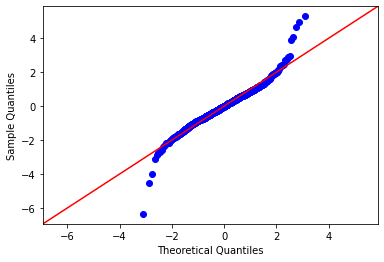

In [21]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0.5, 0, 'Residual')

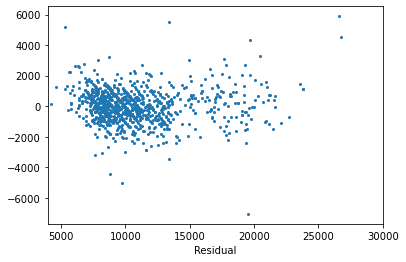

In [22]:
# residual pattern 확인
pred_y = fitted_full_model.predict()
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.xlabel('Residual')

In [23]:
## 검증 데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

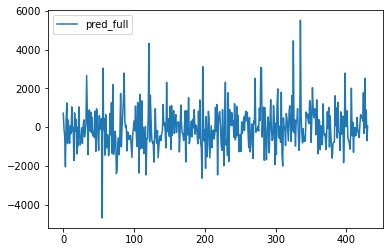

In [24]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2), label='pred_full')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
## MSE 성능
mean_squared_error(y_true = test_y, y_pred = pred_y2)

1172040.1475599094

## 변수선택법

In [29]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델학습
    AIC  = regr.aic # 모델의 AIC
    return {"model":regr, "AIC":AIC}

print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB6D8A1F0>, 'AIC': 19111.581152755498}


In [30]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20dfdee6310>,
 'AIC': 17015.6415185872}

In [32]:
## 모든 조합을 고려해 가장 좋은 모델을 반환
import time
import itertools
# getBest : 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k): # k : 변수의 수
    tic = time.time()  # start time
    results = []    # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k):  # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))   # 모델링된 것들을 저장
    models = pd.DataFrame(results)   # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()]  #index
    toc = time.time() # end time
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic),
         "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed 630 models on 2 predictors in 1.0373647212982178 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17546.209544
Name: 211, dtype: object


In [33]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [34]:
# feedforward selection
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), "seconds")

Processed 36 models on 1 predictors in 0.09973549842834473 seconds.
Processed 630 models on 2 predictors in 0.9736669063568115 seconds.
Processed 7140 models on 3 predictors in 10.04848051071167 seconds.
Total elapsed time: 11.383390426635742 seconds


In [35]:
models

,AIC,model
1,17787.282123,<statsmodels.regression.linear_model.Regressio...
2,17546.209544,<statsmodels.regression.linear_model.Regressio...
3,17403.011334,<statsmodels.regression.linear_model.Regressio...


In [37]:
models.loc[3,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1965.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:27:20   Log-Likelihood:                -8697.5
No. Observations:                1005   AIC:                         1.740e+04
Df Residuals:                    1001   BIC:                         1.742e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0231      0.001    -16.223      0.000      -0.026      -0.020
Mfg_Year    1511.5779     38.218     39.552      0.000    1436.582    1586.574
Weight        17.7979      0.962     18.505      0.000      15.911      19.685
const      -3.029e+06   7.59e+04    -39.891      0.000   -3.18e+06   -2.88e+06
==============================================================================
Omnibus:                      190.293   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1964.843
Skew:                          -0.538   Prob(JB):                         0.00
Kurtosis:                       9.765   Cond. No.                     1.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# 모든 변수들 모델링 한것과 비교
print('full model Rsquared:','{:.5f}'.format(fitted_full_model.rsquared))
print('full model AIC:','{:.5f}'.format(fitted_full_model.aic))
print('selected model Rsquared:','{:.5f}'.format(models.loc[3,'model'].rsquared))
print('selected model AIC:','{:.5f}'.format(models.loc[3,'model'].aic))

full model Rsquared: 0.90700
full model AIC: 17015.64152
selected model Rsquared: 0.85485
selected model AIC: 17403.01133


Text(0, 0.5, 'BIC')

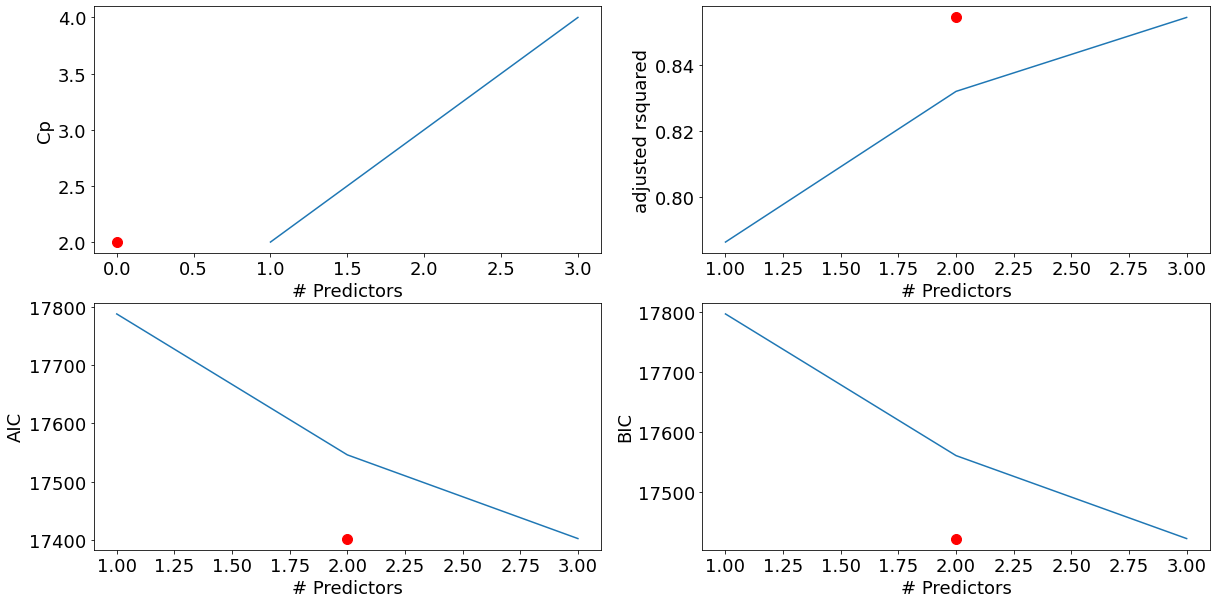

In [40]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})


## Mallow Cp
plt.subplot(2,2,1)
Cp = models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                                  fitted_full_model.mse_total)*(train_x.shape[0]-
                                   row[1].params.shape[0])/fitted_full_model.mse_total), axis=1)

plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2,2,2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel("# Predictors")
plt.ylabel('adjusted rsquared')

#aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2,2,3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2,2,4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel("# Predictors")
plt.ylabel('BIC')

#  변수가 증가할수록 모델이 더 좋아지고있음

## 전진선택법

In [41]:
## 전진선택법(step-1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names,' AIC:', best_model[0])
    return best_model


In [42]:
## 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=['AIC','model'])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10ro : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elaped time:', (toc-tic), "seconds.")
    
    return(Fmodels['model'][len(Fmodels['model'])])

In [43]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.08270072937011719
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0796880>
Processed 35 models on 2 predictors in 0.08727502822875977
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB07A36A0>
Processed 34 models on 3 predictors in 0.0890045166015625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB097E190>
Processed 33 models on 4 predictors in 0.09374332427978516
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB095BE50>
Processed 32 models on 5 predictors in 0.08507347106933594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Wei

In [44]:
Forward_best_model.aic

16998.607757512113

In [45]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     453.0
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:16:36   Log-Likelihood:                -8477.3
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     983   BIC:                         1.711e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1097.3428    132.499      8.282      0.000     837.330    1357.356
Automatic_airco   2270.2198    189.101     12.005      0.000    1899.132    2641.307
HP                  22.9551      3.610      6.358      0.000      15.870      30.040
Weight               9.5025      1.183      8.033      0.000       7.181      11.824
KM                  -0.0154      0.001    -11.187      0.000      -0.018      -0.013
Powered_Windows    348.1940     90.279      3.857      0.000     171.031     525.357
Quarterly_Tax       14.9181      1.923      7.759      0.000      11.145      18.691
Guarantee_Period    69.7998     14.391      4.850      0.000      41.559      98.041
Petrol            -4.11e+04   5111.975     -8.041      0.000   -5.11e+04   -3.11e+04
BOVAG_Guarantee    530.9134    135.130      3.929      0.000     265.737     796.090
Sport_Model        357.9921     88.985      4.023      0.000     183.369     532.615
Tow_Bar           -245.9810     83.412     -2.949      0.003    -409.666     -82.296
Backseat_Divider  -365.4134    131.812     -2.772      0.006    -624.079    -106.748
Mfr_Guarantee      215.3761     78.773      2.734      0.006      60.793     369.959
Age_08_04          -31.0153     11.067     -2.802      0.005     -52.734      -9.297
Boardcomputer     -286.6252    122.868     -2.333      0.020    -527.740     -45.511
Automatic          457.2014    164.796      2.774      0.006     133.810     780.593
CNG              -4.336e+04   5115.023     -8.477      0.000   -5.34e+04   -3.33e+04
ABS               -279.1946    108.620     -2.570      0.010    -492.348     -66.041
Airco              198.7748     93.977      2.115      0.035      14.357     383.192
Metallic_Rim       189.4742     95.160      1.991      0.047       2.735     376.213
Cylinders        -5.068e+05   6.12e+04     -8.276      0.000   -6.27e+05   -3.87e+05
Diesel           -4.225e+04   5100.078     -8.283      0.000   -5.23e+04   -3.22e+04
const            -1.267e+05   1.53e+04     -8.276      0.000   -1.57e+05   -9.67e+04
==============================================================================
Omnibus:                       95.782   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.763
Skew:                           0.055   Prob(JB):                    1.60e-135
Kurtosis:                       6.849   Cond. No.                     6.63e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##  후진소거법

In [52]:
### 후진소거법(step=1)

def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names,' AIC:', best_model[0])
    return best_model


In [57]:
## 후진소거법 모델

def backward_model(X,y):
    Bmodels = pd.DataFrame(columns=['AIC','model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']
   
    toc = time.time()
    print('Total elaped time:', (toc-tic), "seconds.")
    
    return(Bmodels['model'].dropna().iloc[0])

In [58]:
Backward_best_model = backward_model(X=train_x, y=train_y)

Processed 36 models on 35 predictors in 0.4752624034881592
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB07A50D0>
Processed 35 models on 34 predictors in 0.8939507007598877
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Mo

In [59]:
Backward_best_model.aic

16998.607757512116

In [60]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     453.0
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:46:12   Log-Likelihood:                -8477.3
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     983   BIC:                         1.711e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -279.1946    108.620     -2.570      0.010    -492.348     -66.041
Age_08_04          -31.0153     11.067     -2.802      0.005     -52.734      -9.297
Airco              198.7748     93.977      2.115      0.035      14.357     383.192
Automatic          457.2014    164.796      2.774      0.006     133.810     780.593
Automatic_airco   2270.2198    189.101     12.005      0.000    1899.132    2641.307
BOVAG_Guarantee    530.9134    135.130      3.929      0.000     265.737     796.090
Backseat_Divider  -365.4134    131.812     -2.772      0.006    -624.079    -106.748
Boardcomputer     -286.6252    122.868     -2.333      0.020    -527.740     -45.511
Cylinders         -5.17e+05   6.24e+04     -8.280      0.000    -6.4e+05   -3.95e+05
Diesel            1115.6285    438.262      2.546      0.011     255.593    1975.665
Guarantee_Period    69.7998     14.391      4.850      0.000      41.559      98.041
HP                  22.9551      3.610      6.358      0.000      15.870      30.040
KM                  -0.0154      0.001    -11.187      0.000      -0.018      -0.013
Metallic_Rim       189.4742     95.160      1.991      0.047       2.735     376.213
Mfg_Year          1097.3428    132.499      8.282      0.000     837.330    1357.356
Mfr_Guarantee      215.3761     78.773      2.734      0.006      60.793     369.959
Petrol            2258.0684    463.459      4.872      0.000    1348.586    3167.550
Powered_Windows    348.1940     90.279      3.857      0.000     171.031     525.357
Quarterly_Tax       14.9181      1.923      7.759      0.000      11.145      18.691
Sport_Model        357.9921     88.985      4.023      0.000     183.369     532.615
Tow_Bar           -245.9810     83.412     -2.949      0.003    -409.666     -82.296
Weight               9.5025      1.183      8.033      0.000       7.181      11.824
const            -1.293e+05   1.56e+04     -8.280      0.000    -1.6e+05   -9.86e+04
==============================================================================
Omnibus:                       95.782   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.763
Skew:                           0.055   Prob(JB):                    1.60e-135
Kurtosis:                       6.849   Cond. No.                     8.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 단계적 선택법

In [62]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC','model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10ro : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
    toc = time.time()
    print('Total elapsed time:', (toc-tic), 'seconds')
    return (Stepmodels['model'][len(Stepmodels['model'])])
        

In [63]:
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

Processed 36 models on 1 predictors in 0.08008146286010742
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB054E250>
forward
Processed 1 models on 0 predictors in 0.002933025360107422
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB071E6D0>
Processed 35 models on 2 predictors in 0.09146595001220703
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0565340>
forward
Processed 2 models on 1 predictors in 0.007916927337646484
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB04CB550>
Processed 34 models on 3 predictors in 0.09301972389221191
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.Regress

Processed 15 models on 14 predictors in 0.058905601501464844
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB1450040>
Processed 21 models on 16 predictors in 0.12533926963806152
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'Petrol', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'Age_08_04', 'Boardcomputer', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0569D60>
forward
Processed 16 models on 15 predictors in 0.056833505630493164
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarante

Processed 23 models on 22 predictors in 0.14647984504699707
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'Age_08_04', 'Boardcomputer', 'Automatic', 'CNG', 'ABS', 'Airco', 'Metallic_Rim', 'Cylinders', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0540910>
backward
Processed 14 models on 23 predictors in 0.08935785293579102
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'Age_08_04', 'Boardcomputer', 'Automatic', 'CNG', 'ABS', 'Airco', 'Metallic_Rim', 'Cylinders', 'Diesel', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB06ED3A0>
forward


Processed 23 models on 22 predictors in 0.23009920120239258
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'Age_08_04', 'Boardcomputer', 'Automatic', 'CNG', 'ABS', 'Airco', 'Metallic_Rim', 'Cylinders', 'Diesel', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0569D00>
backward
Processed 14 models on 23 predictors in 0.1252121925354004
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Backseat_Divider', 'Mfr_Guarantee', 'Age_08_04', 'Boardcomputer', 'Automatic', 'CNG', 'ABS', 'Airco', 'Metallic_Rim', 'Cylinders', 'Diesel', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000020DB0526580>
forward
P

In [64]:
Stepwise_best_model.aic

16998.60775751211

## 성능평가

In [65]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (23,) (23,)


In [66]:
# 모델에 의해 예측된/추정된 값 <-> test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [67]:
perf_mat = pd.DataFrame(columns=['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                       index = ['MSE','RMSE','MAE','MAPE'])


In [68]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100
from sklearn import metrics

In [69]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y,pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y,pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y,pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y,pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y,pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y,pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y,pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y,pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y,pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y,pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y,pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y,pred_y_stepwise)

print(perf_mat)

                ALL        FORWARD        BACKWARD        STEPWISE
MSE   1172040.14756  1176425.11859  1176425.118579  1176425.118584
RMSE     1082.60803    1084.631328     1084.631328     1084.631328
MAE      804.997252     804.407334      804.407334      804.407334
MAPE       8.063263       8.070741        8.070741        8.070741


In [70]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
24
23
23
